In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [90]:
# Quelle: https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution
def convolution(image, kernel):
    output = np.copy(image)
    # Zero padding
    output = np.pad(output, ((1,1), (1,1)), mode='constant')
    for i, image_row in enumerate(output):
        for k, image_pixel in enumerate(image_row):
            acc = 0.0
            for n, kernel_row in enumerate(kernel):
                for m, kernel_pixel in enumerate(kernel_row):
                    if n == 0 and m == 0:
                        i_saved = i
                        k_saved = k
                    
                    
                    if n == (i - i_saved) and m == (k - k_saved):
                        acc += float(kernel_pixel) * float(image_pixel)

            output[i][k] = acc

    # Shave off the padding
    return output[1:-1,1:-1]

In [4]:
def convert_string_matrix_to_array(base, type_=float):
    return np.array([[type_(number) for number in line.split(" ")] for line in base.split("\n") if line != ""])

In [130]:
def sobel_max(*images):
    height = len(images[0])
    width = len(images[0][0])
    output = np.zeros((height, width), dtype=int)
    for i in range(height):
        for j in range(width):
            output[i][j] = max([image[i][j] for image in images])

    return output

## Eingabe aus Aufgabe

In [133]:
base = convert_string_matrix_to_array("""
5 2 6 2 3 2 1 2 3 1
1 3 6 7 9 2 4 4 7 1
1 5 8 8 10 17 21 19 9 4
4 18 34 56 17 25 38 17 7 2
1 14 22 43 68 91 62 23 16 7
6 12 21 21 39 87 76 34 4 2
9 24 54 73 88 95 69 16 12 5
3 5 6 40 34 42 6 4 2 5
4 9 16 14 32 51 13 6 6 2
4 2 5 3 3 3 5 3 3 3
""", type_=int)

mean_value = np.ones((3,3)) * 1/9

sobel_operator_x = convert_string_matrix_to_array("""
1 0 -1
2 0 -2
1 0 -1
""") * 1/4

sobel_operator_y = convert_string_matrix_to_array("""
1 2 1
0 0 0
-1 -2 -1
""") * 1/4

sobel_operator_forward_slash = convert_string_matrix_to_array("""
0 -1 -2
1 0 -1
2 1 0
""") * 1/4

sobel_operator_backward_slash = """
???
"""


## Eingabe als Bild

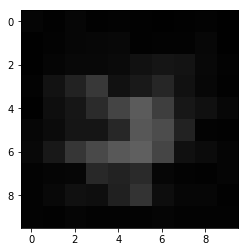

In [7]:
plt.imshow(base, cmap="gray", norm=NoNorm())

# TODO Grauwertspeizung

In [ ]:
# TODO Grauwertspreizung

## Sobel Operator along x-axis

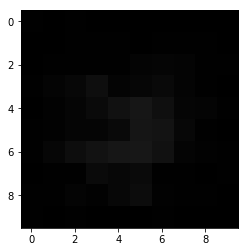

In [140]:
x = convolution(base, sobel_operator_x)
plt.imshow(x, cmap="gray", norm=NoNorm())

## Sobel Operator along y-axis

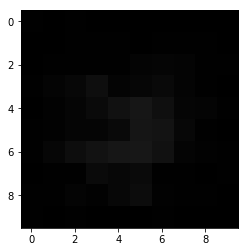

In [137]:
y = convolution(base, sobel_operator_y)
plt.imshow(y, cmap="gray", norm=NoNorm())

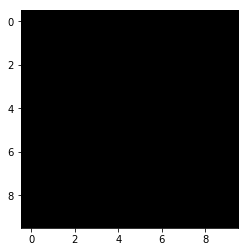

In [135]:
forward_slash = convolution(base, sobel_operator_forward_slash)
plt.imshow(forward_slash, cmap="gray", norm=NoNorm())

In [136]:
#backward_slash = convolution(base, sobel_operator_backward_slash)
#plt.imshow(forward_slash, cmap="gray", norm=NoNorm())

## Max of all 

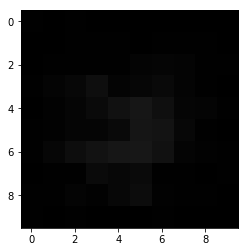

In [139]:
output = sobel_max(x, y, forward_slash)
plt.imshow(output, cmap="gray", norm=NoNorm())